# Capstone Project - The Battle of the Neighborhoods

# Finding Potential Market Area To Start An Indian Restaurent In Newyork 

### 1. Installing and Importing Python Libraries

In [5]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests
from bs4 import BeautifulSoup
!pip install geocoder
import geocoder
import os
!pip install folium
import folium # map rendering library
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline


print('Libraries imported.')

     |████████████████████████████████| 98 kB 10.4 MB/s eta 0:00:01
     |████████████████████████████████| 93 kB 3.8 MB/s  eta 0:00:01
Libraries imported.


### 2. Data Extraction And Cleaning

### EXTRACTING NEWYORK CITY DATA AND ITS BOROUGHS

In [48]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests
from bs4 import BeautifulSoup
!pip install geocoder
import geocoder
import os
!pip install folium
import folium # map rendering library
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

url='https://cocl.us/new_york_dataset'
resp=requests.get('https://cocl.us/new_york_dataset').json()
    # all data is present in features label
features=resp['features']
    
    # define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
new_york_data = pd.DataFrame(columns=column_names)
    
for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
    
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)



new_york_data

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
5,Bronx,Kingsbridge,40.881687,-73.902818
6,Manhattan,Marble Hill,40.876551,-73.910660
7,Bronx,Woodlawn,40.898273,-73.867315
8,Bronx,Norwood,40.877224,-73.879391
9,Bronx,Williamsbridge,40.881039,-73.857446


##### EXTRACTING WIKIPEDIA TABLE- INDIAN POPULATION IN NEWYORK BOROUGHS

In [32]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
!conda install html5lib
from pandas.io.html import read_html

                                                                                                                                            
url="https://en.wikipedia.org/wiki/Indians_in_the_New_York_City_metropolitan_region"

table=read_html(url, attrs={"class":"wikitable sortable"})


df=pd.DataFrame(table[0])


df=df.dropna()
df=df.set_index('Rank')
df

Solving environment: done

# All requested packages already installed.



,Borough,City,Indian Americans,Density of Indian Americans per square mile,Percentage of Indian Americans in municipality's population
Rank,,,,,
1.0,Queens (2014)[33],New York City,144896,1326.5,6.2
2.0,Brooklyn (2012),New York City,25270,357.9,1.0
3.0,Manhattan (2012),New York City,24359,1060.9,1.5
4.0,The Bronx (2012),New York City,16748,398.6,1.2
5.0,Staten Island (2012),New York City,6646,113.6,1.4


### DATA VISUALIZATION

##### BarPlot to show Indian population in newyork boroughs

Solving environment: done

# All requested packages already installed.



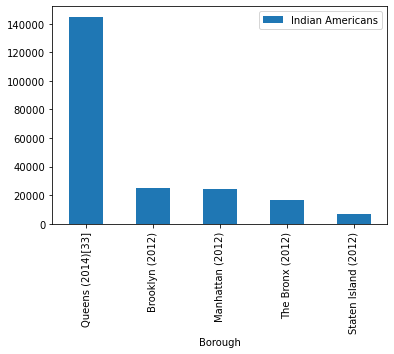

In [10]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
!conda install html5lib
from pandas.io.html import read_html
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
url="https://en.wikipedia.org/wiki/Indians_in_the_New_York_City_metropolitan_region"

table=read_html(url, attrs={"class":"wikitable sortable"})

df=pd.DataFrame(table[0])


df=df.dropna()
df=df.set_index('Rank')

df.plot(x = "Borough", y = "Indian Americans", kind = "bar")
plt.show()




FROM THE ABOVE GRAPH IT IS EVIDENT THAT QUEENS BOROUGH HAS HIGHEST NUMBER OF INDIANS

AND STARTING A RESTAURENT IN QUEENS IS A GOOD DECISION AS WE CAN HAVE MORE CUSTOMERS

#### Function To Get The Geocodes of a location using Geopy

In [15]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests
from bs4 import BeautifulSoup
!pip install geocoder
import geocoder
import os
!pip install folium
import folium # map rendering library
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

address = 'QUEENS, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of QUEENS are {}, {}.'.format(latitude, longitude))


The geograpical coordinate of QUEENS are 40.7498243, -73.7976337.
